In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Tensors

Exercise 1: A simple neural network

In [35]:
# Define a simple linear model
class SimpleLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self,x):
      return self.linear(x)
# Initialize the model, loss function, and optimizer
model = SimpleLinearModel(1,1)

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"The device is set to: {device}")

The device is set to: cpu


In [37]:
model = model.to(device)

In [38]:
print("Weight ", model.linear.weight)
print("Bias ", model.linear.bias)

Weight  Parameter containing:
tensor([[-0.7310]], requires_grad=True)
Bias  Parameter containing:
tensor([-0.2303], requires_grad=True)


In [39]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [40]:
# Create a dataset (for simplicity, we use a small synthetic dataset)
# X is the input features, y is the target labels
n_pts = 2048
X = torch.rand(n_pts,1)
w = 5
b = 3
y = w * X + b + 0.1 * torch.randn(n_pts,1) # adding gaussian noise

# Create DataLoader
dataset = TensorDataset(X, y)
trainloader = DataLoader(dataset, batch_size=256, shuffle=True, drop_last=True) # drop_last is used if the last batch is not big enough to discard it

In [41]:
# Training loop
num_epochs = 50
losses = []
weights = []
biases = []

model.train()
for epoch in range(num_epochs):
  running_loss = 0.00
  for inputs, labels in trainloader:
    inputs, labels = inputs.to(device), labels.to(device)
    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Save the loss, weight, and bias
    losses.append(loss.item())
    weights.append(model.linear.weight.item())
    biases.append(model.linear.bias.item())

    running_loss += loss.item()

  print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}")



Epoch [1/50], Loss: 33.6703
Epoch [2/50], Loss: 22.5789
Epoch [3/50], Loss: 15.2213
Epoch [4/50], Loss: 10.3375
Epoch [5/50], Loss: 7.0955
Epoch [6/50], Loss: 4.9409
Epoch [7/50], Loss: 3.5080
Epoch [8/50], Loss: 2.5535
Epoch [9/50], Loss: 1.9162
Epoch [10/50], Loss: 1.4891
Epoch [11/50], Loss: 1.2016
Epoch [12/50], Loss: 1.0066
Epoch [13/50], Loss: 0.8729
Epoch [14/50], Loss: 0.7800
Epoch [15/50], Loss: 0.7144
Epoch [16/50], Loss: 0.6670
Epoch [17/50], Loss: 0.6315
Epoch [18/50], Loss: 0.6041
Epoch [19/50], Loss: 0.5822
Epoch [20/50], Loss: 0.5639
Epoch [21/50], Loss: 0.5482
Epoch [22/50], Loss: 0.5343
Epoch [23/50], Loss: 0.5215
Epoch [24/50], Loss: 0.5096
Epoch [25/50], Loss: 0.4984
Epoch [26/50], Loss: 0.4877
Epoch [27/50], Loss: 0.4774
Epoch [28/50], Loss: 0.4675
Epoch [29/50], Loss: 0.4579
Epoch [30/50], Loss: 0.4485
Epoch [31/50], Loss: 0.4393
Epoch [32/50], Loss: 0.4303
Epoch [33/50], Loss: 0.4215
Epoch [34/50], Loss: 0.4130
Epoch [35/50], Loss: 0.4046
Epoch [36/50], Loss: 0.39

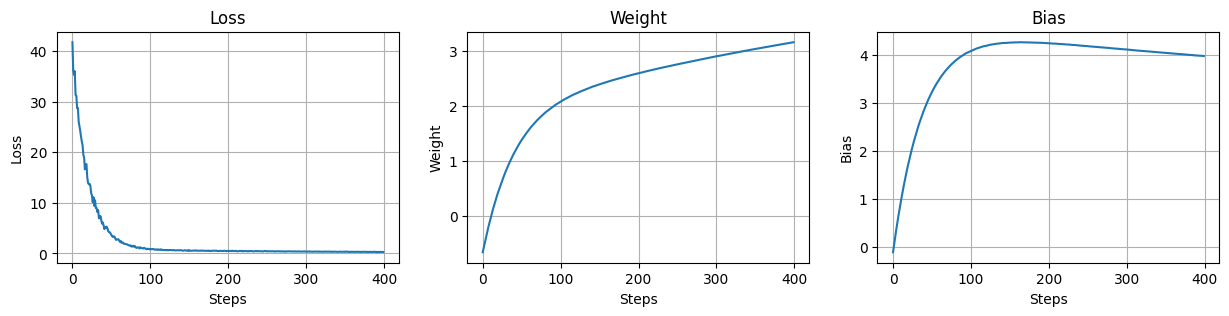

In [42]:
fig, ax = plt.subplots(1,3, figsize=(15,3))

ax[0].plot(losses)
ax[0].set_title("Loss")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Loss")
ax[0].grid()

ax[1].plot(weights)
ax[1].set_title("Weight")
ax[1].set_xlabel("Steps")
ax[1].set_ylabel("Weight")
ax[1].grid()

ax[2].plot(biases)
ax[2].set_title("Bias")
ax[2].set_xlabel("Steps")
ax[2].set_ylabel("Bias")
ax[2].grid()


In [43]:
# Inspecting the learned weights and biases
weights = model.linear.weight.data
biases = model.linear.bias.data

print(f"Learned weight: {weights}")
print(f"Learned bias: {biases}")

Learned weight: tensor([[3.1561]])
Learned bias: tensor([3.9829])
